# 04ISFOV - COMPUTER VISION 

## Face Detection and Tracking

**Lo scopo di questa esercitazione è quello di realizzare un sistema di riconoscimento e di tracciamento di volti in un’immagine utilizzando OpenCV.**

## WARM UP

Un processo di riconoscimento di oggetti (volti, in questo caso) è generalmente efficiente se basato sul rilevamento di feature che includano informazioni aggiuntive riguardo la classe di oggetti da rilevare. In questa esercitazione useremo le Haar-like features e i Local Binary Patterns (LBP) per codificare i contrasti evidenziati dal volto umano e le sue relazioni spaziali con gli altri oggetti presenti in un’immagine.<br/> Tali feature sono tipicamente estratti utilizzando un classificatore a cascata (Cascade Classifier) che deve essere “addestrato” in modo da riconoscere con precisione oggetti diversi: la classificazione di volti sarà, infatti, ben diversa dalla classificazione di automobili. Ai fini di questa esercitazione utilizzeremo i classificatori già addestrati messi a disposizione da OpenCV (e presenti nella cartella “data”, resa anche disponibile come file zip sul portale della didattica).<br/> La prima operazione da fare per svolgere questa esercitazione è, pertanto, quella di visualizzare il flusso video dalla webcam del vostro computer. Potete anche utilizzare un video registrato in precedenza: l’importante è che sia presente almeno un volto. 

## Classificatori di Haar

Usate i classificatori basati su Haar per rilevare il volto all’interno dei singoli frame del video. Nel rilevare il volto, seguitene anche il movimento. Mostrate a schermo il volto/i volti riconosciuti, applicando a quanto viene riconosciuto un rettangolo colorato.<br/> Provate i vari classificatori di Haar per i volti frontali presenti nella cartella “data” (disponibile come zip sul portale della didattica e nel package cv2.data.haarcascades): quello che cambia, essenzialmente, è il set di immagini con cui sono stati addestrati. Scegliete, poi, quello/i che preferite

## Il codice: Pacchetti da importare

In [1]:
%matplotlib inline
%pylab inline 
from ipywidgets import interact
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import time
plt.rcParams['figure.figsize'] = (10,6)

Populating the interactive namespace from numpy and matplotlib


## Caricare i classificatori

In [2]:
face_cascade = cv.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('haarcascades/haarcascade_eye.xml')
lbp_face_cascade = cv.CascadeClassifier('lbpcascade/lbpcascade_frontalface.xml')

### _Suggerimenti_
- prima di cercare eventuali volti in un frame (col metodo detectMultiScale()), convertite il frame in scala di grigi ed equalizzarne l’istogramma con equalizeHist(), in modo da effettuare una ricerca più accurata; 
- nel ricercare i volti nel frame, il metodo detectMultiScale() potete indicare la dimensione minima possibile del volto   (oggetti di dimensione minore non saranno considerati): potete fare varie prove per la dimensione minima del volto da riconoscere, ma una dimensione tipicamente soddisfacente corrisponde al 20% dell’altezza del frame; 
- il metodo detectMultiScale() memorizza tutti volti trovati in un frame in una tupla (x, y, w, h): per “incorniciarli” con un rettangolo, occorre, per ognuno di essi, disegnare il rettangolo a schermo con rectangle(). 

In [12]:
vid = cv.VideoCapture(0)
# Put the code in try-except statements
# Catch the keyboard exception and 
# release the camera device and 
# continue with the rest of code.
try:
    while(True):
        # Capture frame-by-frame
        ret, frame = vid.read()
        if not ret:
            # Release the Video Device if ret is false
            vid.release()
            # Message to be displayed after releasing the device
            print("Released Video Resource")
            break
        
        # converting BGR to HSV
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        
        # define range of red color in HSV
        lower_red = np.array([30, 150, 50])
        upper_red = np.array([255, 255, 180])

        # create a red HSV colour boundary and
        # threshold HSV image
        mask = cv.inRange(hsv, lower_red, upper_red)

        # Bitwise-AND mask and original image
        res = cv.bitwise_and(frame, frame, mask=mask)
        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        gray2 = cv.equalizeHist(gray)
        faces = face_cascade.detectMultiScale(gray2, 1.3, 5)
        for (x, y, w, h) in faces:
            cv.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            roi_gray = gray[y:y + h, x:x + w]
            roi_color = frame[y:y + h, x:x + w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            for (ex, ey, ew, eh) in eyes:
                cv.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)       
        frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)       
        # Turn off the axis
        axis('off')
        # Title of the window
        title("Face Detection")
        # Display the frame
        imshow(frame)
        show()
        # Display the frame until new frame is available
        clear_output(wait=True)
except KeyboardInterrupt:
        # Release the Video Device
    vid.release()
        # Message to be displayed after releasing the device
    print("Released Video Resource")

Released Video Resource


## LOCAL BINARY PATTERN 

Ripete quanto fatto con i classificatori di Haar per riconoscere il volto ma usando i classificatori basati su LBP: c’è differenza rispetto ai primi? Qual è più accurato? Qual è più veloce? 

In [11]:
vid = cv.VideoCapture(0)
# Put the code in try-except statements
# Catch the keyboard exception and 
# release the camera device and 
# continue with the rest of code.
try:
    while(True):
        # Capture frame-by-frame
        ret, frame = vid.read()
        if not ret:
            # Release the Video Device if ret is false
            vid.release()
            # Message to be displayed after releasing the device
            print("Released Video Resource")
            break
        
        # converting BGR to HSV
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        
        # define range of red color in HSV
        lower_red = np.array([30, 150, 50])
        upper_red = np.array([255, 255, 180])

        # create a red HSV colour boundary and
        # threshold HSV image
        mask = cv.inRange(hsv, lower_red, upper_red)

        # Bitwise-AND mask and original image
        res = cv.bitwise_and(frame, frame, mask=mask)
        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        gray2 = cv.equalizeHist(gray)
        faceslbp = face_cascade.detectMultiScale(gray2, 1.3, 5)
        for (x, y, w, h) in faceslbp:
            cv.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            roi_gray = gray[y:y + h, x:x + w]
            roi_color = frame[y:y + h, x:x + w]    
        frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)       
        # Turn off the axis
        axis('off')
        # Title of the window
        title("LBP Face Detection ")
        # Display the frame
        imshow(frame)
        show()
        # Display the frame until new frame is available
        clear_output(wait=True)
except KeyboardInterrupt:
        # Release the Video Device
    vid.release()
        # Message to be displayed after releasing the device
    print("Released Video Resource")

Released Video Resource


## Testiamo i due classificatori

Eseguiremo entrambi i classificatori su due immagini di test per vedere la precisione e la velocità di ciascuno.

In [5]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv.CascadeClassifier('lbpcascade/lbpcascade_frontalface.xml')

#load test image1
test1 = cv.imread('images/test5.jpg')
#load test image2
test2 = cv.imread('images/test6.jpg')

### Test 1 
Proviamo entrambi i classificatori nell'immagine test1
Per comodità creiamo delle funzioni da richiamare quando servono.

In [6]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    #just making a copy of image passed, so that passed image is not changed
    img_copy = colored_img.copy()
    
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv.cvtColor(img_copy, cv.COLOR_BGR2GRAY)
    
    #let's detect multiscale (some images may be closer to camera than others) images
    faces = face_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);
    
    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    return img_copy

def convertToRGB(img):
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [7]:
#------------HAAR-----------
#note time before detection
t1 = time.time()

#call our function to detect faces
haar_detected_img = detect_faces(haar_face_cascade, test1)

#note time after detection
t2 = time.time()
#calculate time difference
dt1 = t2 - t1
#print the time differene

#------------LBP-----------
#note time before detection
t1 = time.time()

lbp_detected_img = detect_faces(lbp_face_cascade, test1)

#note time after detection
t2 = time.time()
#calculate time difference
dt2 = t2 - t1
#print the time differene

Ora possiamo mostrare i risultati e vedere quale dei due è più performante.

Vediamo i risultati:

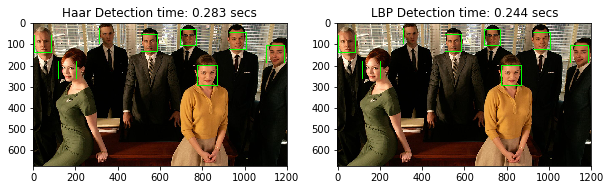

In [8]:
#----------Let's do some fancy drawing-------------
#create a figure of 2 plots (one for Haar and one for LBP)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#show Haar image
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img))

#show LBP image
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(lbp_detected_img))

#show images
# plt.imshow(faces_detected_img)

### Test 2

Vediamo il risultato per la seconda immagine di test. Il codice è esattamente come sopra.

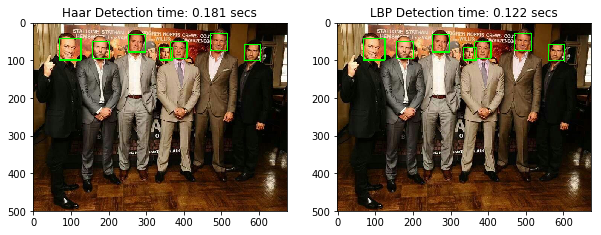

In [9]:
#------------HAAR-----------
#note time before detection
t1 = time.time()

#call our function to detect faces
haar_detected_img = detect_faces(haar_face_cascade, test2)

#note time after detection
t2 = time.time()
#calculate time difference
dt1 = t2 - t1
#print the time differene

#------------LBP-----------
#note time before detection
t1 = time.time()

lbp_detected_img = detect_faces(lbp_face_cascade, test2)

#note time after detection
t2 = time.time()
#calculate time difference
dt2 = t2 - t1
#print the time differene

#----------Let's do some fancy drawing-------------
#create a figure of 2 plots (one for Haar and one for LBP)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#show Haar image
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img))

#show LBP image
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(lbp_detected_img))

#show images
# plt.imshow(faces_detected_img

## Note finali e link utili:

Come possiamo notare LBP è leggermente veloce di Haar. Controllando altri test si nota che LBP è molto più veloce ma meno preciso rispetto Haar, ma queste ultime prove sembra che si stiano eguagliando.
- Repository dove ho preso l'ultimo test: https://github.com/informramiz/Face-Detection-OpenCV
- Tutorial su Haar Cascade in OpenCV: https://docs.opencv.org/3.4.3/d7/d8b/tutorial_py_face_detection.html 